# Activity 2 - Hubble's Law

In this activity, we will measure the redshifts and distances of several galaxies to build our own version of Hubble's Law.

## Step 1 - Taking data
Follow the instructions in the provided PDF (activity02_instructions.pdf). You should have measured the wavelengths of the Ca H or K line and the angular sizes of galaxies, and recorded them in the provided Google Sheets file.  

\

Upload your data file into Colab, or link the Sheets file from your drive.

## Step 2 - Reading in galaxy data

Let's read in our data!

Modify the cell below to:
- read in the data file using the astropy.ascii.read() function (or whatever function you prefer)
- print out the table to make sure it looks ok
- pull out each column into it's own variable
- convert the angular size and wavelength arrays to numpy arrays (so we can do math with them later)


In [1]:
# always start by importing useful packages
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
%matplotlib inline

In [3]:
# Read in the data file
data = ascii.read('Activity02 - data.csv', format='csv')

# Print out the table
data

Galaxy,Angular Size,Wavelength
str8,float64,float64
NGC 1357,0.956,3999.3
NGC 1832,0.894,3997.0
NGC 2276,0.843,3999.3
NGC 2775,1.435,3989.3
NGC 2903,3.568,3973.8
NGC 3034,3.435,3973.0
NGC 3147,1.215,4004.8
NGC 3227,1.444,3984.6
NGC 3368,2.25,3981.5


In [5]:
# Pull out each column into it's own variable
name = data["Galaxy"]
theta = data["Angular Size"]  # milliradians
wave_obs = data["Wavelength"] # angstroms


# Convert these arrays to numpy arrays
theta = np.array(data["Angular Size"])
wave_obs = np.array(data["Wavelength"])

print(theta)
print(wave_obs)

[0.956 0.894 0.843 1.435 3.568 3.435 1.215 1.444 2.25  2.78  2.684 0.734
 1.239 0.49  0.811 0.668 1.205 0.786]
[3999.3 3997.  3999.3 3989.3 3973.8 3973.  4004.8 3984.6 3981.5 3976.9
 3979.2 3992.4 3983.1 4040.4 4000.9 3986.9 3987.7 4002.4]


## Step 3 - Calculating redshifts

Now that we have the observed Ca II wavelength for each galaxy, we can calculate the radial velocity.

Use the Doppler shift equation to calculate the radial velocity of each galaxy. Refer to the instructions page for the rest wavelengths of the Ca K & H lines. Save these values as a new array.

In [6]:
# radial velocity
# v / c = delta_lambda / lambda

wave_rest = 3968.5    # Angstroms
c = 3e5               # km/s

rv = (wave_obs - wave_rest) / wave_rest * c
print(rv)

[2328.33564319 2154.46642308 2328.33564319 1572.38251228  400.65515938
  340.17890891 2744.10986519 1217.08454076  982.73907018  635.00062996
  808.86985007 1806.72798287 1103.69157112 5435.30301121 2449.28814414
 1390.95376087 1451.43001134 2562.68111377]


## Step 4 - Calculating distances

We will use the standard ruler technique to measure the galaxy distances. Since we think these galaxies are all spiral galaxies, we can assume they have the same physical size as another spiral galaxy, Andromeda. Andromeda is 22 kpc in diameter.

Then, using the small angle formula, we can calculate the distance to each galaxy from the angular size:
$$ distance = \frac{diameter}{angular~size}$$

Note -- For this formular to work, we first need to convert the angular size into radians.

In the cell below, calculate the distance to each galaxy in kpc. Then, convert the distances to megaparsecs (Mpc).

In [8]:
# WRITE CODE HERE
diameter = 22   # kpc

d = diameter / (theta / 1000)    # d = pc,   theta = mrad --> radians

d = d / 1000    # Mpc
print(d)

[23012.55230126 24608.50111857 26097.27164887 15331.01045296
  6165.91928251  6404.65793304 18106.99588477 15235.45706371
  9777.77777778  7913.66906475  8196.72131148 29972.7520436
 17756.25504439 44897.95918367 27127.00369914 32934.13173653
 18257.26141079 27989.82188295]
[23.0125523  24.60850112 26.09727165 15.33101045  6.16591928  6.40465793
 18.10699588 15.23545706  9.77777778  7.91366906  8.19672131 29.97275204
 17.75625504 44.89795918 27.1270037  32.93413174 18.25726141 27.98982188]


## Step 5 - Hubble's Law

Now we have radial velocities and distances, so let's make a Hubble plot:
- Plot the radial velocity (in km/s) as a function of distance (in Mpc) using a scatter plot.
- Add axis labels
- Change the axis limits as needed

Don't worry if your galaxies don't line up perfectly! We're doing this by eye, so there's bound to be human error.

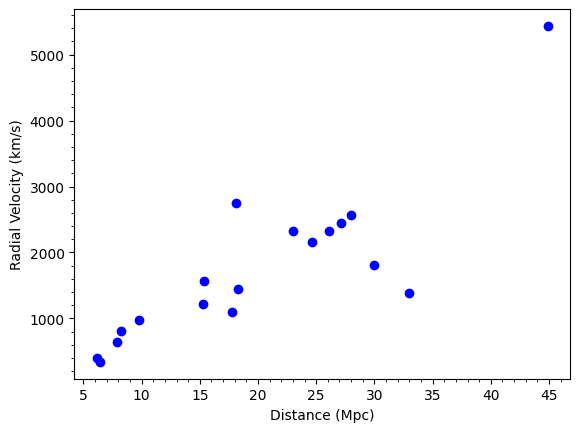

In [10]:
# Hubble plot
plt.plot(d, rv, 'bo')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Radial Velocity (km/s)')
plt.minorticks_on()          # this shows the minor tick marks
plt.show()

Next, we are going to fit a line to our data.
There are a few different functions you can use to do this, but a common one is the linear regression package "scipy.stats.linregress". Run the cell below to import the package:



In [11]:
#import this package
from scipy import stats

To use this package, we give the function x and y arrays, and it will fit a line to our data. The function returns the best fit slope and y-intercept:

> result = stats.linregress(x, y) \
yint = result.intercept  \
slope = result.slope


Write code below to:
- fit a line to your galaxy data (this will be our "model")
- save the best fit slope and y-intercept as new variables
- calculate the model radial velocities (the y values calculated from our model at each x value)


In [22]:
# fit a line to data
result = stats.linregress(d, rv)
slope = result.slope
yint = result.intercept
print(slope)
print(yint)

# model RVs
# y = mx + b
rv_mod = slope * d + yint


95.19071955723338
-140.8904234092679


Then copy your plot from Step 5 into the cell below, and modify the code to overplot the best fit line.

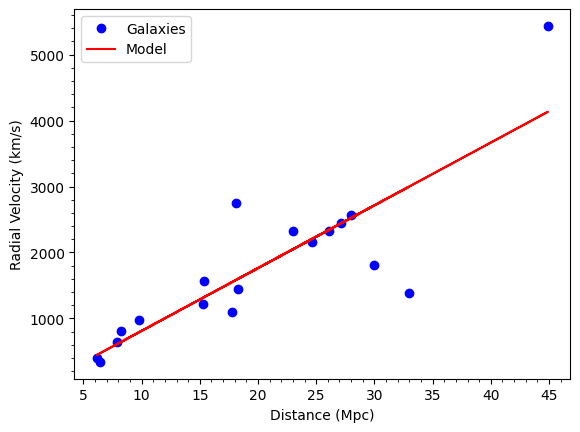

In [23]:
# Hubble plot
plt.plot(d, rv, 'bo', label='Galaxies')
plt.plot(d, rv_mod, color='red', label='Model')
plt.xlabel('Distance (Mpc)')
plt.ylabel('Radial Velocity (km/s)')
plt.minorticks_on()          # this shows the minor tick marks
plt.legend()
plt.show()

## Step 6 - Questions

1. What value did you get for the Hubble constant? Write some code below to calculate your percent error, assuming an accepted value of $H_0 = 71 \pm 4$ km/s per Mpc.

In [24]:
# percent error
# % error = (obs - acc)/acc * 100

error = (slope - 71)/71 * 100
print(' Percent error = ', error)


 Percent error =  34.07143599610335


\

2. Using your value of the Hubble constant, we can estimate the age of the universe!  If the universe has been expanding since its beginning at a constant speed, the universe's age would simply be $1/H_0$.

Write code below to calculate the age of the universe. Some useful numbers:
- $1 \rm{~yr} = 3.16 \times 10^7$ sec
- $1 \rm{~Mpc} = 3.086 \times 10^{19}$ km

In [27]:
# age of the universe
slope_km = slope / 3.086e19 # km/s per Mpc --> km/s per km
t_sec = 1 / slope_km   # seconds
t_yr = t_sec / 3.16e7  # years
t_gyr = t_yr / 1e9     # Gyr

print('Age of the universe = ', t_gyr, ' billion years')



Age of the universe =  10.259217316808316  Gyr



---

## Final instructions
Finish any remaining exercises, then **send me your notebook** to get participation credit. You can download your notebook as an ".ipynb" file and email it, or share the notebook with me through google drive.

\
If you're finishing the activity at home and run into python problems, don't worry about getting the code exactly right. This isn't a coding class and I'm not grading you on how well you know python. If you're stuck, add a text box and explain what you're trying to do *in words*. Then I'll know you have the right idea and know how to apply the content, even if the python code itself is not working. You're also welcome to stop by my office to ask coding questions anytime!